# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key
#print(api_key) #ck import of API key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities #verified print of the city list

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#save config info
url= "http://api.openweathermap.org/data/2.5/weather?"
units= "imperial" #to show temp in F

# combined url for problem calls
query_url=f"{url}units={units}&appid={api_key}"
#query_url # to verify print of the url

#create a list for response storage
query_data=[]

#print a headder at the beginging of the response
print("Beginning Data Retrieval")
print("------------------------")

#set log counter and set identifier
record_count=1
set_number=1

#create a for loop for the list of the cities provided in step 2
#enumerate will assign a couter to the cities
for i, city in enumerate(cities):
    
    #create a conditional statement with modulus operator to segregate set's
    if i%50==0 and i>=50:
        set_number+=1 #reset set number to +1 when city count reached 50
        record_count=0 #reset city count to zero when count reached 50
        time.sleep(2) #add sleep to deley processing in order to prevent blocking of the API
    
    #print(i,"|", city) # prints"# | city_name #creates a count and shows city name
    print("Processing Record %d of Set %d | %s" % (record_count, set_number, city)) #ok, need to incorporate set counter#create a for loop for the list of the cities provided in step 2
    
    record_count+=1  #go to next loop
    
#random 5 cities to limit calls per min so API does not get blocked - row 35-40 for verification during 
#development/debuging of the code purposes only
#city_list=["laguna", "kamyshevatskaya", "amderma", "caravelas", "fiditi"]

#for city in city_list: #loop through the cities in the list; remember to reset to a complete list
    #set an exception for cities without data  
    try:
        
        city_data=requests.get(query_url +"&q="+ city).json()   
        #print(city_data) #verified pull of the data
        #pull data noted in instructions
        cloud_data=city_data["clouds"]["all"] #select the data
        country_data=city_data["sys"]["country"] #select the data
        date_data=city_data["dt"] #select the data
        humidity_data=city_data["main"]["humidity"] #select the data
        lat_data=city_data["coord"]["lat"] #select the data
        lng_data=city_data["coord"]["lon"] #select the data
        max_temp_data=city_data["main"]["temp_max"] #select the data
        wind_data=city_data["wind"]["speed"] #select the data
    
        #append selected data to the list
        query_data.append({"City": city,
                    "Lat": lat_data,
                    "Lng": lng_data,
                    "Max Temp": max_temp_data,
                    "Humidity": humidity_data,
                    "Cloudiness": cloud_data,
                    "Lat": lat_data,
                    "Lng": lng_data,
                    "Max Temp": max_temp_data,
                    "Humidity": humidity_data,
                    "Cloudiness": cloud_data,
                    "Wind Speed": wind_data,
                    "Country": country_data,
                    "Date": date_data})
    except:
        print("City not found. Skipping...")
        
#city_data=pd.DataFrame(query_data) #show in the new window #verification check.df is displayed few cells below

#print a footer at the end of the response
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")   

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | rovaniemi
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | villanueva
Processing Record 4 of Set 1 | chengzihe
Processing Record 5 of Set 1 | goundam
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | kant
Processing Record 8 of Set 1 | bagdarin
Processing Record 9 of Set 1 | tame
Processing Record 10 of Set 1 | charlestown
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | nanortalik
Processing Record 13 of Set 1 | batticaloa
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | lasa
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | lavrentiya
Processing Record 21 of Set 1 | riyadh
Processing Record 22 of Set 1 | armacao dos buzios
City not found. Skipping...
Processing Record 23 of S

Processing Record 37 of Set 4 | alekseyevsk
Processing Record 38 of Set 4 | meadow lake
Processing Record 39 of Set 4 | saint-augustin
Processing Record 40 of Set 4 | sur
Processing Record 41 of Set 4 | rawson
Processing Record 42 of Set 4 | kosh-agach
Processing Record 43 of Set 4 | ilo
Processing Record 44 of Set 4 | ola
Processing Record 45 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 46 of Set 4 | carnarvon
Processing Record 47 of Set 4 | dikson
Processing Record 48 of Set 4 | aanekoski
Processing Record 49 of Set 4 | komsomolskiy
Processing Record 0 of Set 5 | bengkulu
City not found. Skipping...
Processing Record 1 of Set 5 | bentiu
City not found. Skipping...
Processing Record 2 of Set 5 | salta
Processing Record 3 of Set 5 | georgetown
Processing Record 4 of Set 5 | port hardy
Processing Record 5 of Set 5 | piploda
Processing Record 6 of Set 5 | gambela
Processing Record 7 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 8 of Set 5 | loren

Processing Record 21 of Set 8 | hovd
Processing Record 22 of Set 8 | harper
Processing Record 23 of Set 8 | klaksvik
Processing Record 24 of Set 8 | taoru
Processing Record 25 of Set 8 | mount isa
Processing Record 26 of Set 8 | ilhabela
Processing Record 27 of Set 8 | lompoc
Processing Record 28 of Set 8 | aquiraz
Processing Record 29 of Set 8 | oistins
Processing Record 30 of Set 8 | porto novo
Processing Record 31 of Set 8 | atar
Processing Record 32 of Set 8 | muros
Processing Record 33 of Set 8 | rabo de peixe
Processing Record 34 of Set 8 | karpuninskiy
City not found. Skipping...
Processing Record 35 of Set 8 | togur
Processing Record 36 of Set 8 | nome
Processing Record 37 of Set 8 | mayumba
Processing Record 38 of Set 8 | deh rawud
City not found. Skipping...
Processing Record 39 of Set 8 | sabha
Processing Record 40 of Set 8 | muroto
Processing Record 41 of Set 8 | kabare
Processing Record 42 of Set 8 | khandbari
Processing Record 43 of Set 8 | milingimbi
City not found. Skip

Processing Record 9 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 10 of Set 12 | novoanninskiy
Processing Record 11 of Set 12 | grande-riviere
City not found. Skipping...
Processing Record 12 of Set 12 | bukachacha
Processing Record 13 of Set 12 | villa carlos paz
Processing Record 14 of Set 12 | kolokani
Processing Record 15 of Set 12 | petrolina de goias
Processing Record 16 of Set 12 | bukama
Processing Record 17 of Set 12 | srednekolymsk
Processing Record 18 of Set 12 | belaya gora
Processing Record 19 of Set 12 | rosario oeste
Processing Record 20 of Set 12 | santa eulalia del rio
City not found. Skipping...
Processing Record 21 of Set 12 | puri
Processing Record 22 of Set 12 | pemangkat
City not found. Skipping...
Processing Record 23 of Set 12 | canon city
Processing Record 24 of Set 12 | mys shmidta
City not found. Skipping...
Processing Record 25 of Set 12 | moree
Processing Record 26 of Set 12 | putina
Processing Record 27 of Set 12 | salalah
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#convert query_data to df
city_data=pd.DataFrame(query_data) 

#write df to the csv file
city_data.to_csv('output_data/cityData.csv', index_label="City_ID")

# show count of the data in the df
city_data.count()

City          537
Cloudiness    537
Country       537
Date          537
Humidity      537
Lat           537
Lng           537
Max Temp      537
Wind Speed    537
dtype: int64

In [6]:
#show df
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rovaniemi,75,FI,1567691023,76,66.50,25.72,53.60,8.05
1,busselton,0,AU,1567691024,59,-33.64,115.35,44.01,10.69
2,villanueva,0,HN,1567691024,83,15.32,-87.99,84.99,5.82
3,chengzihe,98,CN,1567691024,95,45.35,131.00,62.15,4.16
4,goundam,15,ML,1567691025,25,16.42,-3.66,101.93,11.63


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [11]:
#extract x & y axis data for scatter plots
latitudes=city_data["Lat"]
max_temp=city_data["Max Temp"]
humidity=city_data["Humidity"]
cloudiness=city_data["Cloudiness"]
wind_speed=city_data["Wind Speed"]

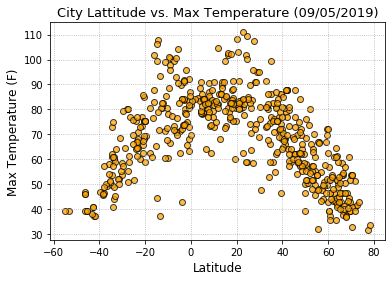

In [12]:
from datetime import date

#build the scatter plot
plt.scatter(latitudes,max_temp, marker="o", facecolor="orange", 
            edgecolor="black", alpha=.75, label="Cities")

#incorporate other graph properties
today=str(date.today().strftime('%m/%d/%Y'))
plt.grid(linestyle="dotted")
plt.title("City Lattitude vs. Max Temperature (%s)"  %today, fontsize=13)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (F)", fontsize=12)

#save and show the plot
plt.savefig("Images/Lat_vs_MaxTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

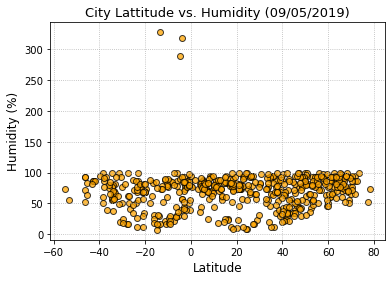

In [13]:
#build the scatter plot
plt.scatter(latitudes,humidity, marker="o", facecolor="orange", 
            edgecolor="black", alpha=.75, label="Cities")

#incorporate other graph properties
plt.grid(linestyle="dotted")
plt.title("City Lattitude vs. Humidity (%s)"  %today, fontsize=13)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)

#save and show the plot
plt.savefig("Images/Lat_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

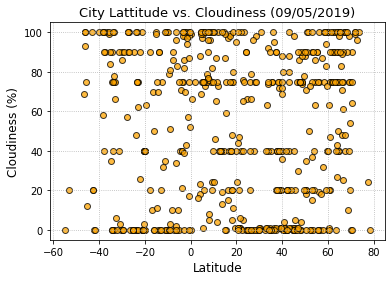

In [15]:
#build the scatter plot
plt.scatter(latitudes,cloudiness, marker="o", facecolor="orange", 
            edgecolor="black", alpha=.75, label="Cities")

#incorporate other graph properties
plt.grid(linestyle="dotted")
plt.title("City Lattitude vs. Cloudiness (%s)"  %today, fontsize=13)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)

#save and show the plot
plt.savefig("Images/Lat_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

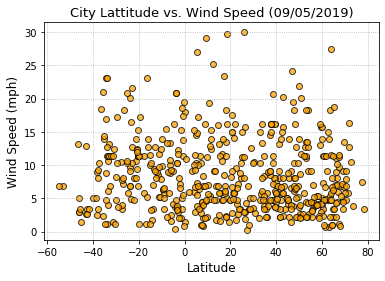

In [16]:
#build the scatter plot
plt.scatter(latitudes,wind_speed, marker="o", facecolor="orange", 
            edgecolor="black", alpha=.75, label="Cities")

#incorporate other graph properties
plt.grid(linestyle="dotted")
plt.title("City Lattitude vs. Wind Speed (%s)"  %today, fontsize=13)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (mph)", fontsize=12)

#save and show the plot
plt.savefig("Images/Lat_vs_WindSpeed.png")
plt.show()